In [1]:
import operator
import os
from collections import defaultdict, Counter

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import multiset

from utils import load_embeddings, load_projects_new, load_stopwords

In [2]:
level  = '3rd'
max_df = 0.8
min_df = 0.1

sett = f'_{max_df}_{min_df}'

In [3]:
projects, imapping = load_projects_new('.', 'java-projects .final.csv', level=f'{level} level')
labels = {k:v for k,v in zip(projects['names'], projects['labels_id'])}

In [4]:
path = "resources/java/stopwords.txt"
stopwords = load_stopwords(path)
path = "resources/en/stopwords.txt"
stopwords.update(load_stopwords(path))

In [5]:

terms_path = '../data/embeddings/terms-count/'
mapping = {v:k for k,v in imapping.items()}

In [6]:
mapping

{3: 'Bean Mapping',
 4: 'Build',
 5: 'Bytecode Manipulation',
 8: 'Caching',
 6: 'CLI',
 9: 'Cluster Management',
 10: 'Code Analysis',
 11: 'Code Coverage',
 12: 'Code Generators',
 13: 'Compilercompiler',
 14: 'Configuration',
 15: 'Constraint Satisfaction Problem Solver',
 7: 'CSV',
 16: 'Data Structures',
 17: 'Database',
 18: 'Date and Time',
 19: 'Dependency Injection',
 20: 'Development',
 21: 'Distributed Applications',
 22: 'Distributed Transactions',
 23: 'Distribution',
 24: 'Document Processing',
 25: 'Financial',
 27: 'Formal Verification',
 29: 'Functional Programming',
 31: 'Game Development',
 32: 'Geospatial',
 30: 'GUI',
 34: 'High Performance',
 33: 'HTTP Clients',
 35: 'Hypermedia Types',
 36: 'Imagery',
 37: 'Introspection',
 40: 'Job Scheduling',
 38: 'JSON',
 39: 'JVM and JDK',
 41: 'Logging',
 42: 'Machine Learning',
 44: 'Messaging',
 45: 'Microservice',
 46: 'Miscellaneous',
 48: 'Monitoring',
 49: 'Native',
 50: 'Natural Language Processing',
 51: 'Networking

In [7]:
from textblob import  Word

data = defaultdict(str)
for project in labels:
    category = mapping[labels[project]]
    if category == 'NA':
        category = 'Miscellaneous'

    try:
        terms_count = load_embeddings(os.path.join(terms_path, f"{project}.vec"))
        terms = []
        for x, y in terms_count.items():
            lemma = Word(x).lemmatize()
            if lemma not in stopwords and len(x) > 1 and x not in stopwords:
                tokens = [lemma] * int(y[0])
                terms.extend(tokens)
        #terms = [[Word(x).lemmatize()] * int(y[0]) for x, y in terms_count.items() if Word(x).lemmatize() not in stopwords and len(x) > 1]
        data[category] += ' ' + " ".join(terms)
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '../data/embeddings/terms-count/asm.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/infinispan.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/infer.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/source.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/org.aspectj.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/JGroups.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/checker-framework.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/libgdx.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/eclipse.platform.swt.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/reflectasm.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/flink.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/Smack.

In [8]:
lab = list(data.keys())
text = [data[k] for k in lab]

In [9]:
import pandas

df = pandas.DataFrame({'text': text, 'label': lab})
#df = df[~df['label'].isin(['NA', 'Miscellaneous'])]

y = df['label'].to_frame()
X = df['text']


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, max_df=max_df, min_df=min_df)
#vectorizer.fit(X)
X_mat = vectorizer.fit_transform(X)

In [11]:
X_mat.shape

(67, 1000)

In [12]:
from sklearn import metrics

simil = metrics.pairwise.cosine_similarity(X_mat)

In [13]:
import numpy as np
import copy

simill = copy.deepcopy(simil)


In [14]:
similarities_3rd = simil[np.triu_indices(simil.shape[0], k=1)]

In [15]:
similarities_3rd

array([0.0404819 , 0.01134311, 0.0293974 , ..., 0.01274767, 0.08416172,
       0.0414547 ])

In [16]:

level  = '1st'
max_df = 0.8
min_df = 0.1

sett = f'_{max_df}_{min_df}'

In [17]:
projects, imapping = load_projects_new('.', 'java-projects .final.csv', level=f'{level} level')
labels = {k:v for k,v in zip(projects['names'], projects['labels_id'])}

In [18]:
path = "resources/java/stopwords.txt"
stopwords = load_stopwords(path)
path = "resources/en/stopwords.txt"
stopwords.update(load_stopwords(path))

In [19]:

terms_path = '../data/embeddings/terms-count/'
mapping = {v:k for k,v in imapping.items()}

In [20]:
mapping

{4: 'Introspection',
 2: 'Development',
 0: 'CLI',
 8: 'Parser',
 11: 'Server',
 9: 'Scientific/Engineering',
 1: 'Data',
 12: 'Testing',
 6: 'NA',
 3: 'Graphical',
 13: 'Web',
 7: 'Networking',
 5: 'Miscellaneous',
 10: 'Security'}

In [21]:
from textblob import  Word

data = defaultdict(str)
for project in labels:
    category = mapping[labels[project]]
    if category == 'NA':
        category = 'Miscellaneous'

    try:
        terms_count = load_embeddings(os.path.join(terms_path, f"{project}.vec"))
        terms = []
        for x, y in terms_count.items():
            lemma = Word(x).lemmatize()
            if lemma not in stopwords and len(x) > 1 and x not in stopwords:
                tokens = [lemma] * int(y[0])
                terms.extend(tokens)
        #terms = [[Word(x).lemmatize()] * int(y[0]) for x, y in terms_count.items() if Word(x).lemmatize() not in stopwords and len(x) > 1]
        data[category] += ' ' + " ".join(terms)
    except Exception as e:
        print(e)

[Errno 2] No such file or directory: '../data/embeddings/terms-count/asm.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/infinispan.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/infer.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/source.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/org.aspectj.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/JGroups.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/checker-framework.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/libgdx.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/eclipse.platform.swt.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/reflectasm.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/flink.vec'
[Errno 2] No such file or directory: '../data/embeddings/terms-count/Smack.

In [22]:
lab = list(data.keys())
text = [data[k] for k in lab]

In [23]:
import pandas

df = pandas.DataFrame({'text': text, 'label': lab})
#df = df[~df['label'].isin(['NA', 'Miscellaneous'])]

y = df['label'].to_frame()
X = df['text']


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, max_df=max_df, min_df=min_df)
#vectorizer.fit(X)
X_mat = vectorizer.fit_transform(X)

In [25]:
X_mat.shape

(13, 1000)

In [26]:
from sklearn import metrics

simil = metrics.pairwise.cosine_similarity(X_mat)

In [27]:
import numpy as np
import copy

simill = copy.deepcopy(simil)


In [28]:
similarities = simil[np.triu_indices(simil.shape[0], k=1)]

/home/sasce/anaconda3/envs/gML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/sasce/anaconda3/envs/gML/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/sasce/anaconda3/envs/gML/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, Futur

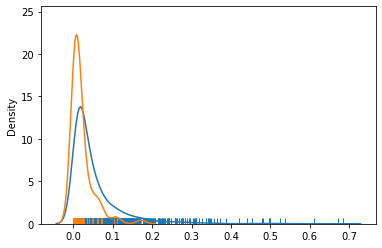

In [29]:
import seaborn as sns

sns.distplot(similarities_3rd, hist=False, rug=True)
sns.distplot(similarities, hist=False, rug=True)


In [30]:
m1 = np.mean(similarities)
s1 = np.std(similarities)

m3 = np.mean(similarities_3rd)
s3 = np.std(similarities_3rd)

In [38]:
print(f'{m1:.4f}\pm{s1:.4f}')
print(f'{m3:.4f}\pm{s3:.4f}')

0.0210\pm0.0290
0.0520\pm0.0677
